# Intraday Trading via Day Trading Techniques & Indicators
---

### Data collected via AlphaVantage free API using extended intraday data. 
> https://www.alphavantage.co/documentation/

---

# 02 - Data Cleaning

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Read in Feature Engineered Dataset

In [2]:
df = pd.read_csv('../01_Data/extended_intraday_SPY_1min_featured.csv')
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)
df.drop(columns = ['time'], inplace = True)

In [3]:
df.head(15)

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 04:01:00,292.170418,292.170418,292.170418,292.170418,581,292.170418,0.000000,NaN,NaN,NaN,...,NaN,292.170418,0.000000,292.170418,0.000000,0.000000,crossing,NaN,flat,down
2019-10-28 04:02:00,292.151078,292.151078,292.141408,292.141408,300,292.160539,-0.019132,NaN,NaN,NaN,...,NaN,292.154301,-0.012893,292.155188,-0.013780,-0.000886,below,-0.009929,flat,down
2019-10-28 04:05:00,292.238108,292.238108,292.238108,292.238108,300,292.180243,0.057865,NaN,NaN,NaN,...,NaN,292.188648,0.049460,292.185636,0.052473,0.003013,above,0.033101,up,up
2019-10-28 04:06:00,292.257448,292.257448,292.228438,292.228438,300,292.190006,0.038432,NaN,NaN,NaN,...,NaN,292.202127,0.026311,292.197992,0.030446,0.004135,above,-0.003309,flat,down
2019-10-28 04:07:00,292.286458,292.286458,292.286458,292.286458,100,292.196107,0.090352,NaN,NaN,NaN,...,NaN,292.227214,0.059244,292.219391,0.067067,0.007823,above,0.019854,up,up
2019-10-28 04:08:00,292.228438,292.228438,292.209098,292.209098,1260,292.201868,0.007230,NaN,NaN,NaN,...,NaN,292.222303,-0.013205,292.217220,-0.008122,0.005084,above,-0.026467,down,down
2019-10-28 04:12:00,292.228438,292.228438,292.209098,292.209098,226,292.202401,0.006697,NaN,NaN,NaN,...,NaN,292.218961,-0.009863,292.215684,-0.006586,0.003277,above,0.000000,flat,down
2019-10-28 04:15:00,292.421839,292.489529,292.421839,292.421839,1703,292.280745,0.141093,NaN,NaN,NaN,...,NaN,292.267717,0.154122,292.251319,0.170520,0.016398,above,0.072804,up,up
2019-10-28 04:16:00,292.354149,292.354149,292.354149,292.354149,412,292.286581,0.067567,NaN,NaN,NaN,...,NaN,292.287683,0.066466,292.267813,0.086335,0.019869,above,-0.023148,down,down


# Create a Mask for Desired Time Frame

**We want to focus on market hours, incorporating only 30 minutes before open and 30 minutes after close when volume is still relatively high.**

In [4]:
test = df.query("time >= '2019-10-28' and time < '2019-10-29'")

In [5]:
test.head()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 04:01:00,292.170418,292.170418,292.170418,292.170418,581,292.170418,0.000000,NaN,NaN,NaN,...,NaN,292.170418,0.000000,292.170418,0.000000,0.000000,crossing,NaN,flat,down
2019-10-28 04:02:00,292.151078,292.151078,292.141408,292.141408,300,292.160539,-0.019132,NaN,NaN,NaN,...,NaN,292.154301,-0.012893,292.155188,-0.013780,-0.000886,below,-0.009929,flat,down
2019-10-28 04:05:00,292.238108,292.238108,292.238108,292.238108,300,292.180243,0.057865,NaN,NaN,NaN,...,NaN,292.188648,0.049460,292.185636,0.052473,0.003013,above,0.033101,up,up
2019-10-28 04:06:00,292.257448,292.257448,292.228438,292.228438,300,292.190006,0.038432,NaN,NaN,NaN,...,NaN,292.202127,0.026311,292.197992,0.030446,0.004135,above,-0.003309,flat,down
2019-10-28 04:07:00,292.286458,292.286458,292.286458,292.286458,100,292.196107,0.090352,NaN,NaN,NaN,...,NaN,292.227214,0.059244,292.219391,0.067067,0.007823,above,0.019854,up,up


In [6]:
test.tail()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 19:53:00,293.369502,293.369502,293.369502,293.369502,200,293.391616,-0.022114,293.391618,-0.022115,293.391620,...,-0.022108,293.391573,-0.022070,293.389613,-0.020111,0.001960,above,0.000000,flat,down
2019-10-28 19:54:00,293.408182,293.408182,293.369502,293.369502,650,293.391615,-0.022113,293.391617,-0.022115,293.391618,...,-0.022109,293.387159,-0.017656,293.387698,-0.018196,-0.000539,below,0.000000,flat,down
2019-10-28 19:57:00,293.388842,293.388842,293.388842,293.388842,100,293.391615,-0.002773,293.391617,-0.002774,293.391618,...,-0.002770,293.387495,0.001347,293.387807,0.001035,-0.000311,below,0.006592,flat,up
2019-10-28 19:59:00,293.398512,293.398512,293.388842,293.388842,305,293.391615,-0.002773,293.391617,-0.002774,293.391618,...,-0.002770,293.387765,0.001078,293.387905,0.000937,-0.000141,below,0.000000,flat,down
2019-10-28 20:00:00,293.446862,293.495213,293.446862,293.485543,2150,293.391620,0.093922,293.391622,0.093921,293.391624,...,0.093927,293.407320,0.078222,293.397204,0.088338,0.010116,above,0.032960,up,up


**We see our timeframe for each day starts at 4am and ends at 8pm Eastern Time**

**Market hours are from 9:30am to 4pm, but remember that we also want some time before open and after close, so we are looking to make a mask for our dataframe to only show the hours from 9:00am to 4:30pm.**

In [7]:
df.shape

(411267, 28)

In [8]:
df_filtered = df.between_time('09:00', '16:30')

In [9]:
df_filtered.shape

(223009, 28)

In [10]:
df_filtered.head()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 09:00:00,292.963361,292.963361,292.944021,292.944021,4019,292.588294,0.355727,292.624673,0.319348,292.661051,...,0.464862,292.862974,0.081047,292.760888,0.183133,0.102085,above,0.000000,flat,down
2019-10-28 09:01:00,292.944021,292.953691,292.905340,292.905340,8011,292.595649,0.309691,292.628422,0.276919,292.661194,...,0.408009,292.871447,0.033894,292.774645,0.130695,0.096801,above,-0.013204,down,down
2019-10-28 09:02:00,292.924681,292.924681,292.915011,292.915011,5268,292.600448,0.314563,292.630436,0.284574,292.660424,...,0.404527,292.880160,0.034851,292.788014,0.126997,0.092146,above,0.003301,flat,up
2019-10-28 09:03:00,292.905340,292.905340,292.895670,292.905340,660,292.601021,0.304320,292.628609,0.276731,292.656198,...,0.387085,292.885196,0.020145,292.799188,0.106153,0.086008,above,-0.003301,flat,down
2019-10-28 09:04:00,292.915011,292.915011,292.895670,292.895670,2709,292.603276,0.292395,292.628085,0.267585,292.652895,...,0.366823,292.887291,0.008380,292.808376,0.087294,0.078914,above,-0.003301,flat,down


**Now we have only the data in our specified time period. To double check, lets observe a specific day.**

In [11]:
test = df_filtered.query("time >= '2019-10-28' and time < '2019-10-29'")

In [12]:
test.head()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 09:00:00,292.963361,292.963361,292.944021,292.944021,4019,292.588294,0.355727,292.624673,0.319348,292.661051,...,0.464862,292.862974,0.081047,292.760888,0.183133,0.102085,above,0.000000,flat,down
2019-10-28 09:01:00,292.944021,292.953691,292.905340,292.905340,8011,292.595649,0.309691,292.628422,0.276919,292.661194,...,0.408009,292.871447,0.033894,292.774645,0.130695,0.096801,above,-0.013204,down,down
2019-10-28 09:02:00,292.924681,292.924681,292.915011,292.915011,5268,292.600448,0.314563,292.630436,0.284574,292.660424,...,0.404527,292.880160,0.034851,292.788014,0.126997,0.092146,above,0.003301,flat,up
2019-10-28 09:03:00,292.905340,292.905340,292.895670,292.905340,660,292.601021,0.304320,292.628609,0.276731,292.656198,...,0.387085,292.885196,0.020145,292.799188,0.106153,0.086008,above,-0.003301,flat,down
2019-10-28 09:04:00,292.915011,292.915011,292.895670,292.895670,2709,292.603276,0.292395,292.628085,0.267585,292.652895,...,0.366823,292.887291,0.008380,292.808376,0.087294,0.078914,above,-0.003301,flat,down


In [13]:
test.tail()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 16:25:00,293.205112,293.205112,293.176101,293.195442,6939,293.392516,-0.197075,293.393399,-0.197958,293.394283,...,-0.194425,293.196058,-0.000616,293.212273,-0.016832,-0.016216,below,0.000000,flat,down
2019-10-28 16:26:00,293.185771,293.195442,293.108411,293.195442,48879,293.392277,-0.196836,293.392987,-0.197545,293.393697,...,-0.194706,293.195934,-0.000493,293.210670,-0.015229,-0.014736,below,0.000000,flat,down
2019-10-28 16:28:00,293.195442,293.214782,293.195442,293.205112,24245,293.392164,-0.187053,293.392671,-0.187560,293.393178,...,-0.185532,293.197770,0.007342,293.210141,-0.005029,-0.012371,below,0.003298,flat,up
2019-10-28 16:29:00,293.205112,293.224452,293.205112,293.224452,690,293.392162,-0.167710,293.392358,-0.167906,293.392554,...,-0.167121,293.203106,0.021345,293.211504,0.012948,-0.008398,below,0.006596,flat,up
2019-10-28 16:30:00,293.205112,293.205112,293.205112,293.205112,303,293.392160,-0.187049,293.392359,-0.187247,293.392558,...,-0.186452,293.203507,0.001604,293.210895,-0.005784,-0.007388,below,-0.006596,flat,down


**Our filter looks good.**

**As a final check, lets make sure the plot of our data does not look significantly different from the unfiltered version.**

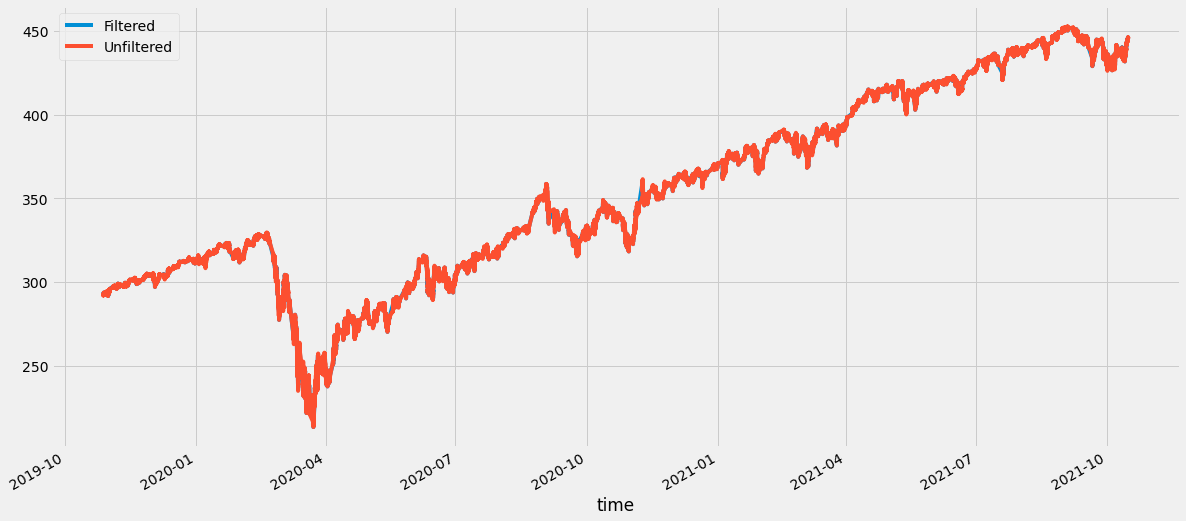

In [14]:
df_filtered['close'].plot(figsize=(18,9))
df['close'].plot(figsize=(18,9))
plt.legend(['Filtered', 'Unfiltered']);

**We have, essentially, a perfect overlap. Removing the data we did has not caused significant variance.**

# Save Filtered Dataset

In [15]:
df_filtered.to_csv('../01_Data/extended_intraday_SPY_1min_filtered.csv')